In [1]:
import numpy as np
import keras
import keras.datasets.mnist
import time

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from keras.layers import Dense, Flatten


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,) 

print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

Sizes...
((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))


In [2]:
# Convert y_train into one-hot format
# !!! Run only once
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [3]:
print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

Sizes...
((60000, 28, 28), (60000, 10))
((10000, 28, 28), (10000, 10))


In [4]:
n=1000
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(n, activation='relu'))
model4.add(Dense(n, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [5]:
start = time.time()
model4.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))
end = time.time()

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.4693 - acc: 0.9150 - val_loss: 0.2082 - val_acc: 0.9476
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2031 - acc: 0.9496 - val_loss: 0.2205 - val_acc: 0.9519
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1878 - acc: 0.9535 - val_loss: 0.1862 - val_acc: 0.9551
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1682 - acc: 0.9582 - val_loss: 0.1675 - val_acc: 0.9569
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1428 - acc: 0.9639 - val_loss: 0.1587 - val_acc: 0.9603
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1282 - acc: 0.9691 - val_loss: 0.1734 - val_acc: 0.9623
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1162 - acc: 0.9719 - val_loss: 0.1361 - val_acc: 0.9701
Epoch 8/10
1875/1875 [==============================] -

In [49]:
#model4.summary()

In [66]:
print("-------------------------------------------------")
print("Benchmark Results for this test")
print()
print("Elapsed Time (min):",(end - start)/60.0)
print(end-start, "seconds")
print("-------------------------------------------------")


-------------------------------------------------
Benchmark Results for this test

Elapsed Time (min): 3.3826238473256427
202.95743083953857 seconds
-------------------------------------------------


## Predictions

In [51]:
#len(x_train)

60000

In [67]:
t = 50000
train_sample = x_train[:t]
test_sample = y_train[:t]

start = time.time()
preds = model4.predict(train_sample)
end = time.time()

print(np.around(preds,1))
print(test_sample)
print('Time to classify ', t, ' images : ', end-start)
print('Average time to classify 1 image : ', round((end-start)/t, 4 ))

#np.array_equal(np.around(preds,1),test_sample)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Time to classify  50000  images :  2.503750801086426
Average time to classify 1 image :  0.0001


In [10]:
import sys
print(model4)
sys.getsizeof(model4)

48

In [11]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('CPU')
print(len(physical_devices))

1


## Pickle and plot

In [41]:
import pandas as pd
dfres = pd.read_pickle('../saved_results/pickledf.pkl')
dfres


,Execution time,Prediction time,By image
Neurons,,,
5,5.19,0.10,0.0
10,5.73,0.08,0.0


In [44]:
import pandas as pd
macdf = pd.read_csv('../saved_results/picklemac.pkl')
macdf


,Execution time,Prediction time,By image
Neurons,,,
5,5.12,0.17,0.0000
10,7.22,0.16,0.0000
50,8.29,0.17,0.0000
128,11.14,0.19,0.0000
256,13.34,0.19,0.0000
512,22.03,0.23,0.0000
1024,71.39,0.62,0.0001
2048,187.41,3.25,0.0003
4096,507.54,3.67,0.0004


In [45]:

dflist = macdf.values.tolist()
dflist

[[5.12, 0.17, 0.0],
 [7.22, 0.16, 0.0],
 [8.29, 0.17, 0.0],
 [11.14, 0.19, 0.0],
 [13.34, 0.19, 0.0],
 [22.03, 0.23, 0.0],
 [71.39, 0.62, 0.0001],
 [187.41, 3.25, 0.0003],
 [507.54, 3.67, 0.0004]]

In [46]:
times_mac = []
for i in macdf.values.tolist():
    times_mac.append(i[0])
times_mac

[5.12, 7.22, 8.29, 11.14, 13.34, 22.03, 71.39, 187.41, 507.54]

In [51]:
idxlist = macdf.index.tolist()
mac_neurons = []
for i in idxlist:
    mac_neurons.append(int(i))
mac_neurons

[5, 10, 50, 128, 256, 512, 1024, 2048, 4096]

In [53]:
frododf = pd.read_csv('../saved_results/picklefrodo.csv')
times_frodo = []
for i in frododf.values.tolist():
    times_frodo.append(i[0])
times_frodo

idxlist = frododf.index.tolist()
frodo_neurons = []
for i in idxlist:
    frodo_neurons.append(int(i))
frodo_neurons


AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py'>

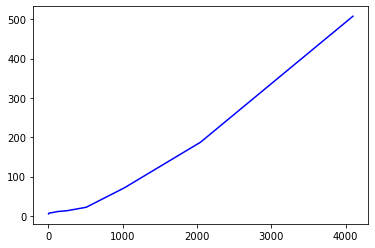

In [52]:
import matplotlib.pyplot as plt 

plt.plot(mac_neurons,times_mac, 'b')
#plt.plot(frodo_neurons, times_frodo, 'r')
plt.show()
